# Diabetic Dataset - Hospital readmission prediction (Case Study #2: DS7331)
SMU Student collaboration:

 - Allen Miller
 - Vijay Kaniti
 - Venkata 'MG' Vanga

### Links
- https://github.com/ResidentMario/missingno

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import missingno as msno
import seaborn as sns

#reading in the CSV files
diabetic_dat = pd.read_csv('https://raw.githubusercontent.com/VenkataVanga/Quantifying-the-World-DS7333-/'\
                       'main/CS%232_Diabetes/diabetic_data.csv')
#diabetic_dat

In [2]:
diabetic_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
diabetic_na = deepcopy(diabetic_dat)
diabetic_na = diabetic_na.replace('?', np.nan)

In [4]:

missing = diabetic_na.isna().sum()
missing = pd.DataFrame(missing, columns = ['missing'])
missing = missing[(missing.T !=0).any()]
missing = missing.sort_values('missing')
missing

,missing
diag_1,21
diag_2,358
diag_3,1423
race,2273
payer_code,40256
medical_specialty,49949
weight,98569


<function matplotlib.pyplot.show(close=None, block=None)>

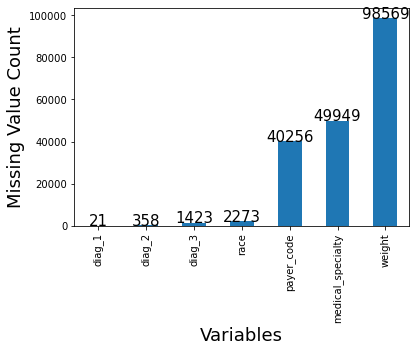

<Figure size 720x1800 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
missing.plot(kind = 'bar', legend = False)
plt.ylabel('Missing Value Count', fontsize=18)
plt.xlabel('Variables', fontsize=18)
plt.xticks(rotation='90')
for index,data in enumerate(missing['missing']):
    plt.text(x=index , y =data+2 , s=f"{data}" , fontdict=dict(fontsize=15), ha='center')
plt.figure(figsize=(10, 25))
plt.show

In [6]:
#msno.heatmap(diabetic_na)

In [7]:
diabetic_na.isnull().sum()/len(diabetic_na)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

### Imputation

In [8]:
# removing data columns where more than 30% of the data is missing.
diabetic_na = diabetic_na.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [9]:
diabetic_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [10]:
#check to see how many values of na can be dropped.
#diabetic_na.dropna()

In [11]:
# filling 'race' with Caucasian as 75% of 'race' is caucasian.
diabetic_na['race'].fillna('Caucasian')

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 101766, dtype: object

In [12]:
# removing data columns where tarnished data values are added.
diabetic_na = diabetic_na.drop(['diag_1','diag_2','diag_3'], axis = 1)

In [13]:
diabetic_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [14]:
diabetic_na = diabetic_na.drop(['encounter_id','patient_nbr'], axis=1)

In [15]:
#Looking at the IDs_mapping.csv we can see that 11,13,14,19,20,21 are related to death or hospice. 
#These samples are removed from the predictive model.

diabetic_na = diabetic_na.loc[~diabetic_na.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [16]:
#Changing readmitted variable to 0(No),1(<30),2(>30)
readmitted = {'<30':1,'NO':0,'>30':2}
diabetic_na.readmitted = [readmitted[item] for item in diabetic_na.readmitted]

In [17]:
# Numerical variables
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [18]:
# Categorical Variables
cols_cat = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'payer_code']

In [19]:
# Conversion of numeric variables into strings
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
diabetic_na[cols_cat_num] = diabetic_na[cols_cat_num].astype('str')

In [20]:
X = diabetic_na.drop('readmitted', axis=1).copy()
y = diabetic_na['readmitted'].copy()
X = pd.get_dummies(X)

In [21]:
diab_LSR = pd.concat((X,y), axis=1)

In [22]:
diab_LSR = pd.DataFrame(diab_LSR)

In [23]:
diab_LSR.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99343 entries, 0 to 101765
Data columns (total 156 columns):
 #   Column                           Dtype
---  ------                           -----
 0   time_in_hospital                 int64
 1   num_lab_procedures               int64
 2   num_procedures                   int64
 3   num_medications                  int64
 4   number_outpatient                int64
 5   number_emergency                 int64
 6   number_inpatient                 int64
 7   number_diagnoses                 int64
 8   race_AfricanAmerican             uint8
 9   race_Asian                       uint8
 10  race_Caucasian                   uint8
 11  race_Hispanic                    uint8
 12  race_Other                       uint8
 13  gender_Female                    uint8
 14  gender_Male                      uint8
 15  gender_Unknown/Invalid           uint8
 16  age_[0-10)                       uint8
 17  age_[10-20)                      uint8
 18  age_

In [24]:
X= X.values
y= y.values

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, shuffle=True, stratify=y,random_state=123)       

In [26]:
from sklearn.model_selection import cross_val_score
for i in np.logspace(-10,9,19,10):
    lr.C = i
    out = cross_val_score(lr,X_train,y_train,scoring='accuracy', cv=5)
    print(out.mean(), out.std(), i)

0.528743108989089 3.9845639092777027e-05 1e-10
0.528743108989089 3.9845639092777027e-05 1.1364636663857243e-09
0.528743108989089 3.9845639092777027e-05 1.2915496650148827e-08
0.528743108989089 3.9845639092777027e-05 1.4677992676220706e-07
0.5288979748754544 0.00015223098227964719 1.6681005372000591e-06
0.5459951910344564 0.001579749074642597 1.8957356524063752e-05
0.5656322204408796 0.0021843977449038697 0.00021544346900318867
0.5706034674364753 0.002951814951309958 0.002448436746822229
0.5708357746600985 0.003216595447321724 0.02782559402207126
0.5709751690671622 0.003603284456611301 0.31622776601683794
0.5708203055791039 0.0037532886209191217 3.593813663804626
0.5708822502548351 0.0036677768638260057 40.84238652674517
0.5708048185108059 0.0037037472695758294 464.15888336127915
0.5709287066631148 0.003614826789824825 5274.997063702631
0.5706964114310272 0.0036700301560455497 59948.425031894214
0.5707118973001717 0.003707050013612464 681292.0690579622
0.5708512653258572 0.0033614653746

In [27]:
lr = LogisticRegression(max_iter=10000,C = 0.0278)
Readmiss_pred = lr.fit(X_train,y_train)
Readmiss_pred.score(X_test,y_test)

0.573092519628426

In [28]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(lr,X_test,y_test, cv=5)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred, 
                            target_names=['No_readmission', 'readmission <30days', 'readmission >30days']))

                     precision    recall  f1-score   support

     No_readmission       0.59      0.87      0.70     18385
readmission <30days       0.45      0.02      0.04      3960
readmission >30days       0.50      0.30      0.38     12426

           accuracy                           0.57     34771
          macro avg       0.51      0.40      0.38     34771
       weighted avg       0.54      0.57      0.51     34771



<function matplotlib.pyplot.show(close=None, block=None)>

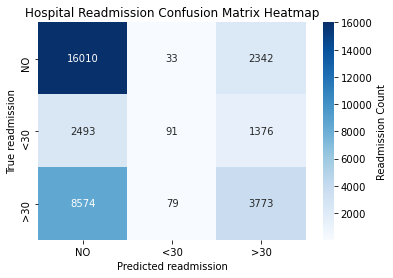

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm0 = confusion_matrix(y_test,pred)
x_axis_labels = ['NO','<30', '>30']
y_axis_labels = ['NO','<30', '>30']
ax = plt.axes()
sns.heatmap(cm0, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Readmission Count',})
ax.set_title('Hospital Readmission Confusion Matrix Heatmap')
plt.xlabel("Predicted readmission")
plt.ylabel("True readmission") 
plt.show


In [31]:
cm0

array([[16010,    33,  2342],
       [ 2493,    91,  1376],
       [ 8574,    79,  3773]], dtype=int64)

In [32]:
#Feature Importance
feature_names = diab_LSR.drop('readmitted', axis=1).copy().columns.values
feature_importances = pd.DataFrame(Readmiss_pred.coef_[0],
                                   index = feature_names,
                                  columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [33]:
feature_importances

,importance
admission_source_id_4,0.257133
discharge_disposition_id_25,0.226875
admission_type_id_8,0.202263
admission_source_id_6,0.185885
discharge_disposition_id_23,0.173286
...,...
admission_source_id_3,-0.164843
admission_source_id_7,-0.179148
number_inpatient,-0.276728
admission_type_id_6,-0.292732


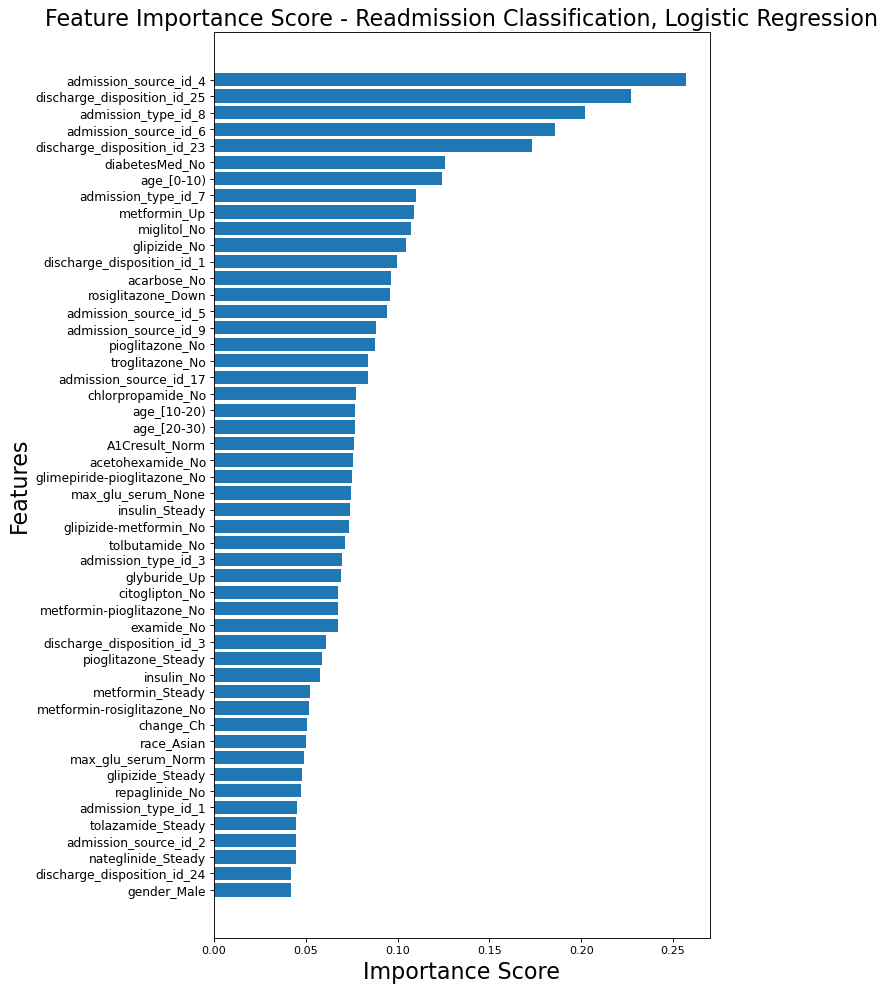

In [34]:
#Feature Importance plot
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features', fontsize=20)
plt.xlabel('Importance Score', fontsize=20)
plt.title('Feature Importance Score - Readmission Classification, Logistic Regression', fontsize=20)
plt.yticks(ylocs, feature_labels, fontsize=11)


plt.show()
